In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os

fn = 'handheld_female_circ'

while True:
    cwd = os.getcwd()
    print(cwd)
    if ('imgs' not in cwd) and ('debug' not in cwd):
        break
    else:
        print('Changing directory to parent')
    %cd ..


df = pd.read_csv(f'{fn}.csv', index_col=[0], header=[0,1]).reset_index(drop=True)

# create folder with name fn in folder imgs
if not os.path.exists('./imgs/' + fn):
    print('Creating folder' + fn)
    os.makedirs('./imgs/' + fn)

%cd "imgs"
%cd $fn

df['gyro'] = df['gyro'] * 64

sample_rate = 200
dt = 1/sample_rate
zupt_tresh = 3
margin = int(0.15 * sample_rate)  # 100 ms
debug_ZUPT = False

df.index /= sample_rate
df

c:\Users\arada\Documents\Projects\Uni\final project\MARG Dead-reckoning\imgs\handheld_female_rect
Changing directory to parent
c:\Users\arada\Documents\Projects\Uni\final project\MARG Dead-reckoning\imgs
c:\Users\arada\Documents\Projects\Uni\final project\MARG Dead-reckoning\imgs
Changing directory to parent
c:\Users\arada\Documents\Projects\Uni\final project\MARG Dead-reckoning
c:\Users\arada\Documents\Projects\Uni\final project\MARG Dead-reckoning
Creating folderhandheld_female_circ
c:\Users\arada\Documents\Projects\Uni\final project\MARG Dead-reckoning\imgs
c:\Users\arada\Documents\Projects\Uni\final project\MARG Dead-reckoning\imgs\handheld_female_circ


C:\Users\arada\AppData\Local\Temp\ipykernel_5124\331491727.py:19: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = pd.read_csv(f'{fn}.csv', index_col=[0], header=[0,1]).reset_index().drop(columns='time')


accel                          gyro                            mag  \
               x         y         z         x         y         z          x   
0.000  -1.019946  5.784480 -8.370256 -0.696181  3.067105 -1.400696  70.113719   
0.005  -1.019946  5.784480 -8.370256 -0.696181  3.067105 -1.400696  70.113719   
0.010  -1.019946  5.784480 -8.370256 -0.696181  3.067105 -1.400696  70.113719   
0.015  -1.019946  5.784480 -8.370256 -0.696181  3.067105 -1.400696  70.113719   
0.020  -1.019946  5.784480 -8.370256 -0.696181  3.067105 -1.400696  70.113719   
...          ...       ...       ...       ...       ...       ...        ...   
28.295 -0.282520  4.826784 -8.877835  4.076299  1.839905  1.939976  64.090593   
28.300 -0.282520  4.826784 -8.877835  4.076299  1.839905  1.939976  64.090593   
28.305 -0.282520  4.826784 -8.877835  4.076299  1.839905  1.939976  64.090593   
28.310 -0.282520  4.826784 -8.877835  4.076299  1.839905  1.939976  64.090593   
28.315 -0.282520  4.826784 -8.877835  4.076299  1.839905  1.939976  64.090593   

                                      Q                                
                y           z         w         x         y         z  
0.000   92.089554 -111.125811  0.300275  0.949432  0.088392 -0.024511  
0.005   92.089554 -111.125811  0.300275  0.949432  0.088392 -0.024511  
0.010   92.089554 -111.125811  0.300275  0.949432  0.088392 -0.024511  
0.015   92.089554 -111.125811  0.300275  0.949432  0.088392 -0.024511  
0.020   92.089554 -111.125811  0.300275  0.949432  0.088392 -0.024511  
...           ...         ...       ...       ...       ...       ...  
28.295  95.748648 -112.812558  0.247843  0.950083  0.187335  0.028657  
28.300  95.748648 -112.812558  0.247843  0.950083  0.187335  0.028657  
28.305  95.748648 -112.812558  0.247843  0.950083  0.187335  0.028657  
28.310  95.748648 -112.812558  0.247843  0.950083  0.187335  0.028657  
28.315  95.748648 -112.812558  0.247843  0.950083  0.187335  0.028657  

[5664 rows x 13 columns]

In [37]:
# filter results
from scipy import signal

b, a = signal.butter(10, 20, fs=200, btype='lowpass', analog=False)
df = df.apply(lambda x: signal.filtfilt(b, a, x))
df

accel                          gyro                            mag  \
               x         y         z         x         y         z          x   
0.000  -1.019993  5.784496 -8.370559 -0.694754  3.065295 -1.392467  70.132136   
0.005  -1.025961  5.785172 -8.363146 -0.656102  2.973527 -1.325881  70.265984   
0.010  -1.028489  5.784676 -8.359198 -0.639979  2.952213 -1.306523  70.278747   
0.015  -1.025180  5.782105 -8.360959 -0.660202  3.047626 -1.361956  70.092083   
0.020  -1.015471  5.777006 -8.368402 -0.716826  3.266822 -1.492804  69.687870   
...          ...       ...       ...       ...       ...       ...        ...   
28.295 -0.338022  4.799052 -8.904857  4.279656  1.464672  1.689579  63.991263   
28.300 -0.299113  4.818774 -8.876485  4.065023  1.725837  1.842483  64.044528   
28.305 -0.279878  4.830134 -8.869008  3.990808  1.858588  1.930656  64.089037   
28.310 -0.277445  4.832954 -8.876964  4.030545  1.880827  1.961007  64.116221   
28.315 -0.284189  4.829875 -8.890403  4.124171  1.840472  1.954670  64.123338   

                                      Q                                
                y           z         w         x         y         z  
0.000   92.085616 -111.102343  0.300280  0.949427  0.088428 -0.024515  
0.005   92.073786 -111.036710  0.300448  0.949380  0.088279 -0.024858  
0.010   92.086183 -111.060836  0.300465  0.949383  0.088159 -0.025015  
0.015   92.138217 -111.227657  0.300225  0.949468  0.088100 -0.024856  
0.020   92.235267 -111.543412  0.299710  0.949640  0.088118 -0.024357  
...           ...         ...       ...       ...       ...       ...  
28.295  95.681671 -112.887522  0.247226  0.950314  0.187248  0.026104  
28.300  95.718558 -112.897690  0.247883  0.950158  0.186981  0.027851  
28.305  95.742823 -112.886889  0.248129  0.950087  0.186927  0.028743  
28.310  95.754076 -112.853717  0.248025  0.950082  0.187083  0.028891  
28.315  95.755248 -112.807950  0.247743  0.950109  0.187358  0.028622  

[5664 rows x 13 columns]

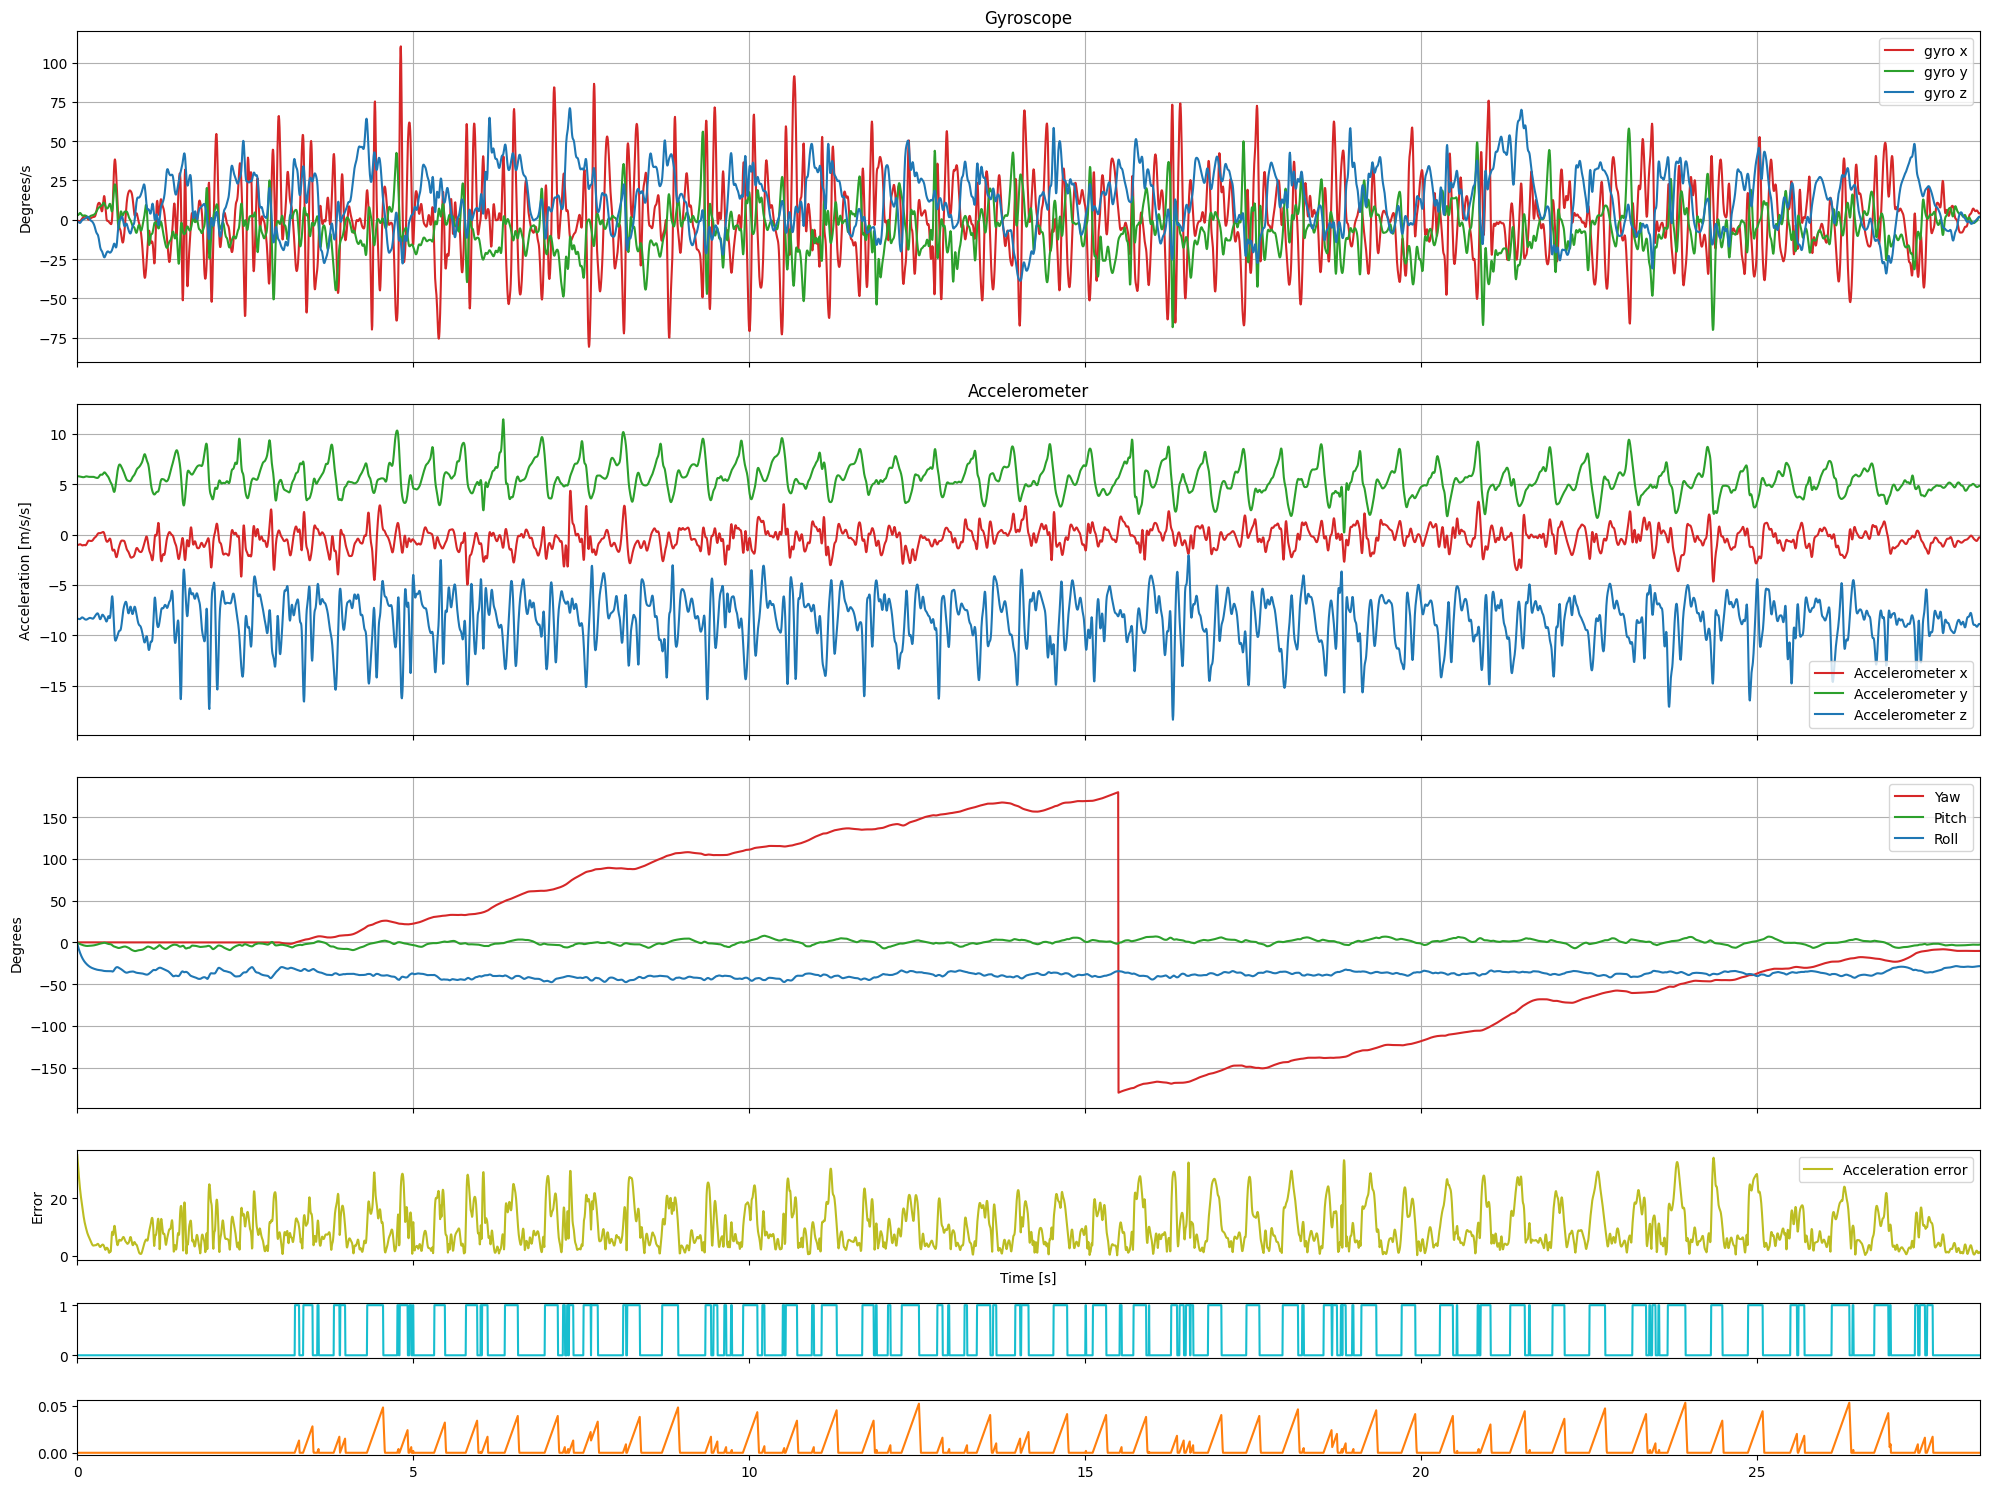

In [38]:
import imufusion

offset = imufusion.Offset(sample_rate)
ahrs = imufusion.Ahrs()
ahrs.settings = imufusion.Settings(imufusion.CONVENTION_NED,
                                   5,  # gain
                                   2000,  # gyroscope range
                                   10,  # acceleration rejection
                                   10,  # magnetic rejection
                                   5 * sample_rate)  # rejection timeout = 5 seconds

def update(x):
    # ahrs.update(x['gyro'].to_numpy(), x['accel'].to_numpy(), x['mag'].to_numpy(), 0.005)
    ahrs.update_no_magnetometer(x['gyro'].to_numpy(), x['accel'].to_numpy(), 0.005)

    euler = ahrs.quaternion.to_euler()
    Q = ahrs.quaternion.wxyz    
    acceleration = ahrs.earth_acceleration  # convert g to m/s/
    
    ans = {}
    ans.update({'x': acceleration[0], 'y':acceleration[1], 'z':acceleration[2]})
    ans.update({'roll': euler[0], 'pitch' : euler[1], 'yaw' : euler[2]})
    ans.update({'Q_T' : Q})
    ans.update({"accel_err" : ahrs.internal_states.acceleration_error})
    ans.update({"accel_igr" : ahrs.internal_states.accelerometer_ignored})
    ans.update({"accel_rec" : ahrs.internal_states.acceleration_recovery_trigger})
    
    ans.update({"ang_rrec" : ahrs.flags.angular_rate_recovery})
    ans.update({"accel_rrec" : ahrs.flags.acceleration_recovery})
    return ans

sf = df.apply(update, axis=1)
sf = pd.DataFrame(list(sf), index=df.index)

plt.style.use('default')

fig, ax = plt.subplots(nrows=6, sharex=True, figsize=(20,15), tight_layout=True, gridspec_kw={"height_ratios": [6, 6, 6, 2, 1, 1]})

ax[0].plot(df.index, df['gyro', 'x'], "tab:red", label='gyro x')
ax[0].plot(df.index, df['gyro', 'y'], "tab:green", label='gyro y')
ax[0].plot(df.index, df['gyro', 'z'], "tab:blue", label='gyro z')
ax[0].set_ylabel('Degrees/s')
ax[0].set_title('Gyroscope')
ax[0].legend()
ax[0].grid()

ax[1].plot(df.index, df['accel', 'x'], "tab:red", label='Accelerometer x')
ax[1].plot(df.index, df['accel', 'y'], "tab:green", label='Accelerometer y')
ax[1].plot(df.index, df['accel', 'z'], "tab:blue", label='Accelerometer z')
ax[1].set_ylabel('Acceleration [m/s/s]')
ax[1].set_title('Accelerometer')
ax[1].legend()
ax[1].grid()

ax[2].plot(sf['yaw'], "tab:red", label='Yaw')
ax[2].plot(sf['pitch'], "tab:green", label='Pitch')
ax[2].plot(sf['roll'], "tab:blue", label='Roll')
ax[2].set_ylabel('Degrees')
ax[2].grid()
ax[2].legend()

ax[3].plot(sf['accel_err'], "tab:olive", label='Acceleration error')
ax[3].set_ylabel('Error')
ax[3].set_xlabel('Time [s]')
ax[3].legend()

ax[4].plot(sf['accel_igr'], "tab:cyan", label='Acceleration ignored')

ax[5].plot(sf['accel_rec'], "tab:orange", label='Acceleration recovery trigger')

for axes in ax:
    axes.set_xlim(0, sf.index.max())

fig.savefig(f'ypr.png',  dpi=300)
plt.show()

calculated g : 8.899271011352539


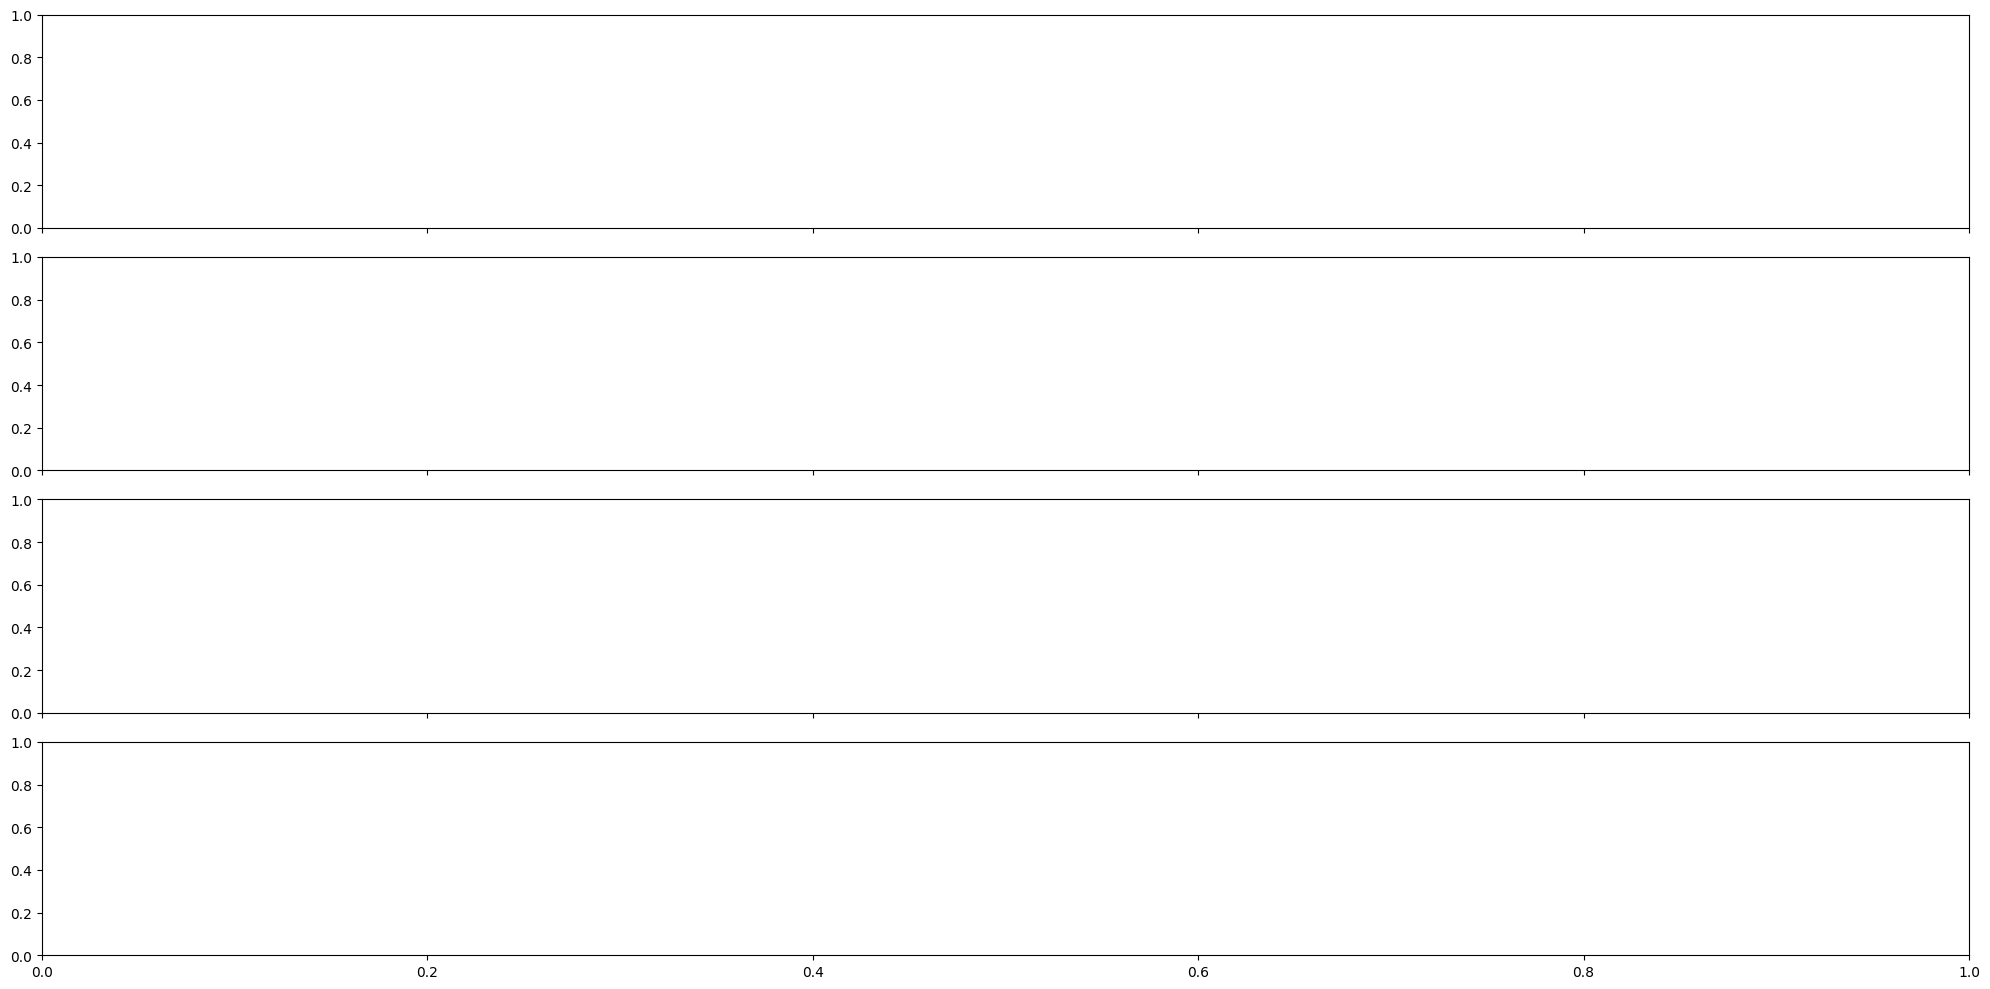

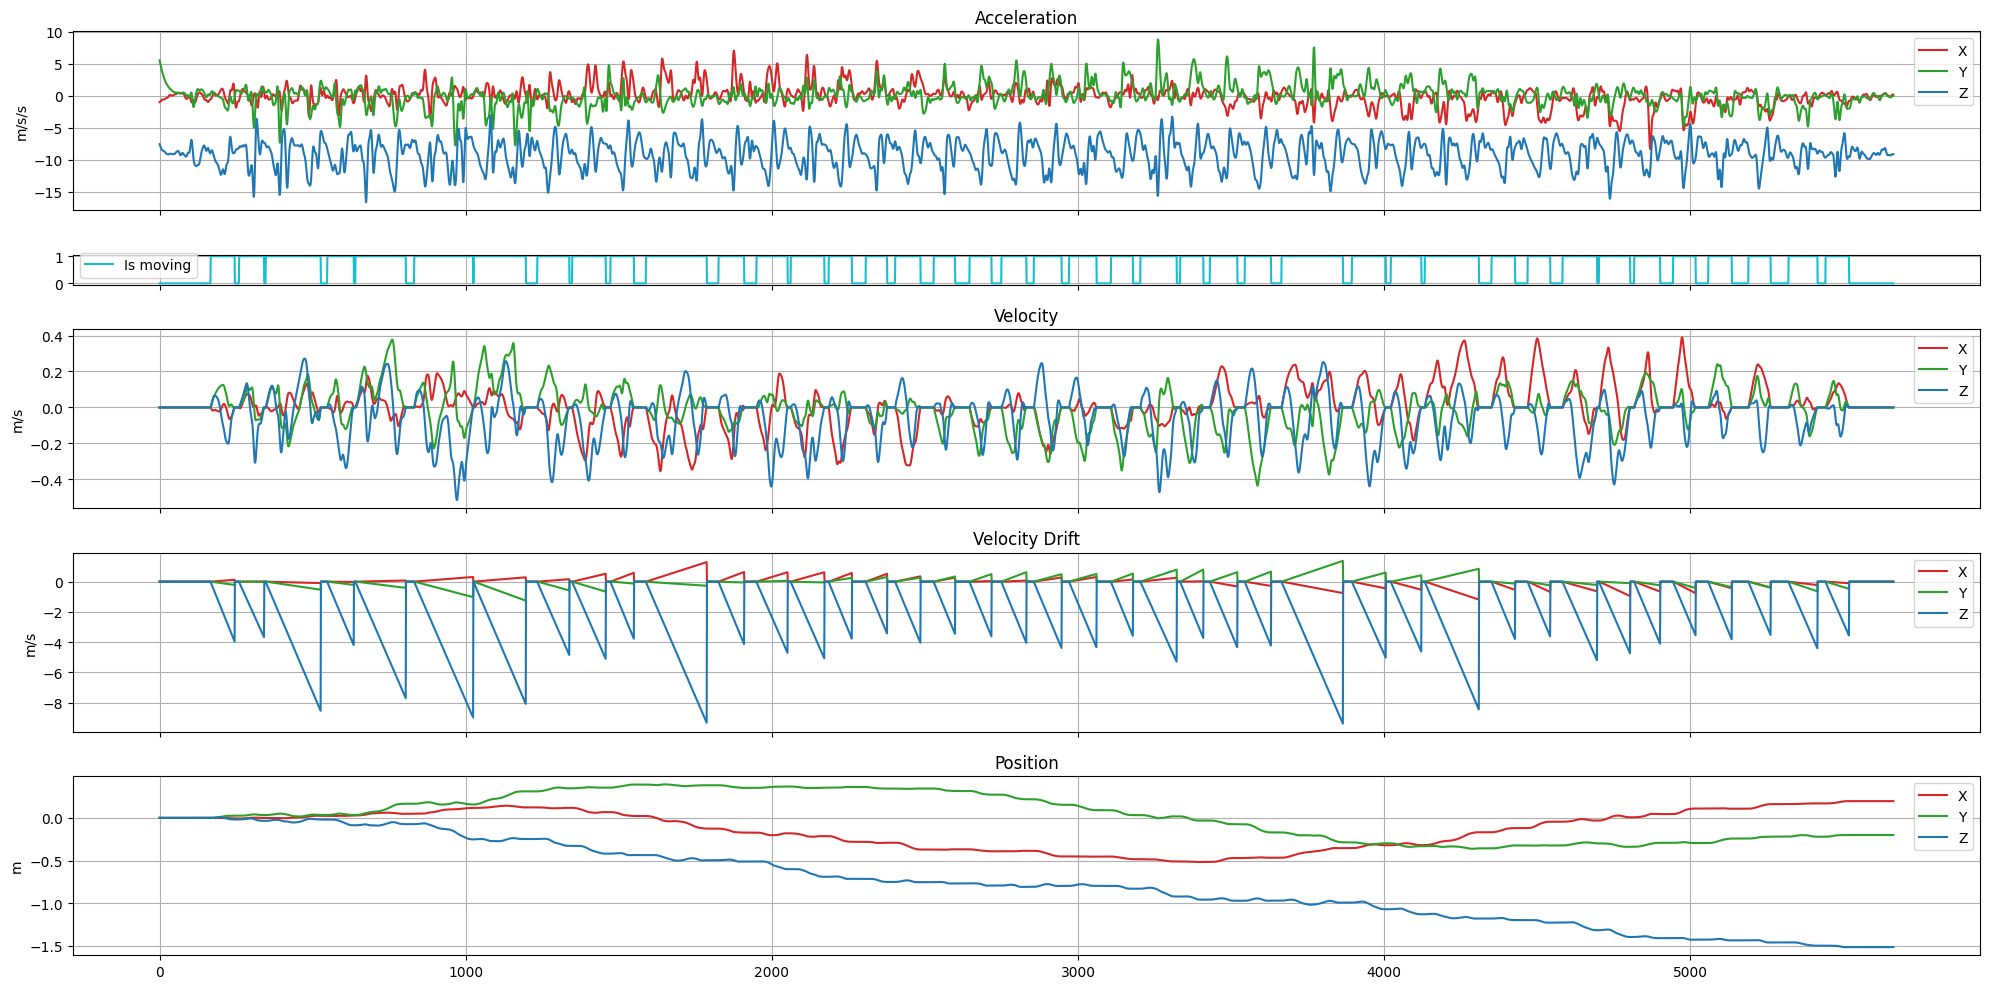

In [39]:
from scipy.signal import find_peaks

hf = sf[['x', 'y', 'z']].to_numpy()
cols = itertools.product(['acceleration'], ('x', 'y', 'z'))
hf = pd.DataFrame(hf, columns=pd.MultiIndex.from_tuples(cols))

# subtract earth gravity
g_end = np.linalg.norm(hf['acceleration'], axis=1)[-100:].mean()
g_start = -hf['acceleration', 'z'][:100].mean()
g = min(g_start, g_end)
print(f'calculated g : {g}')

# ZUPT
fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(20,10), tight_layout=True)

hf['is_moving'] = hf['acceleration'].apply(np.linalg.norm, axis=1) > zupt_tresh + g

if debug_ZUPT:
    ax[0].plot(hf['acceleration'].apply(np.linalg.norm, axis=1) - g, label='norm')
    ax[0].set_ylim(0, 10)
    ax[1].plot(hf['is_moving'], label='is_moving')

for index in range(len(hf) - margin):
    hf.loc[index, 'is_moving'] = any(hf.loc[index:(index + margin), 'is_moving'])  # add leading margin
    
if debug_ZUPT:
    ax[2].plot(hf['is_moving'], label='is_moving trailing')

for index in range(len(hf) - 1, margin, -1):
    hf.loc[index, 'is_moving'] = any(hf.loc[(index - margin):index, 'is_moving']) # add trailing margin

if debug_ZUPT:
    ax[3].plot(hf['is_moving'], label='is_moving leading')
    for axes in ax:
        axes.legend()
    fig.savefig(f'imgs/zupt.png', dpi=300)
    for axes in ax:
        axes.set_xlim(2700, 4000)
    fig.savefig(f'imgs/zupt_zoom.png', dpi=300)


peaks, _ = find_peaks(hf['is_moving'].astype(int))
steps = len(peaks)

# velocity caluclations
velocity = np.zeros((len(hf), 3))
cols = pd.MultiIndex.from_product([['velocity'], ['x', 'y', 'z']])
hf[cols] = hf['acceleration'] * dt
for idx in range(1, len(hf)):
    if hf.loc[idx, 'is_moving'][0]:
        velocity[idx] = velocity[idx - 1] + hf.loc[idx, 'velocity']

hf['velocity'] = velocity

# velocity drift
is_moving_diff = hf['is_moving'].astype(int).diff().fillna(0)
idx_shift_diff = is_moving_diff[is_moving_diff < 0].index
is_moving_diff[idx_shift_diff] = 0
is_moving_diff[idx_shift_diff - 1] = 1
is_moving_diff = is_moving_diff.astype(bool)

cols = pd.MultiIndex.from_product([['velocity_drift'], ['x', 'y', 'z']])
hf[cols] = hf['velocity'].apply(lambda x: x*is_moving_diff)
idx_to_interp = hf[hf['is_moving']]['is_moving'].index.symmetric_difference(is_moving_diff[is_moving_diff].index)
hf.loc[idx_to_interp, 'velocity_drift'] = np.nan
hf['velocity_drift'] = hf['velocity_drift'].interpolate()
hf['velocity'] = hf['velocity'] - hf['velocity_drift']

# Calculate pos
cols = pd.MultiIndex.from_product([['position'], ['x', 'y', 'z']])
hf[cols] = hf['velocity'] * dt
pos = np.zeros((len(hf), 3))
for idx in range(1, len(hf)):
    pos[idx] = pos[idx - 1] + hf.loc[idx, 'position']

hf['position'] = pos

fig, ax = plt.subplots(nrows=5, sharex=True, figsize=(20,10), tight_layout=True, gridspec_kw={"height_ratios": [6, 1, 6, 6, 6]})

ax[0].plot(hf['acceleration', 'x'], "tab:red", label="X")
ax[0].plot(hf['acceleration', 'y'], "tab:green", label="Y")
ax[0].plot(hf['acceleration', 'z'], "tab:blue", label="Z")
ax[0].set_title("Acceleration")
ax[0].set_ylabel("m/s/s")
ax[0].grid()
ax[0].legend()

ax[1].plot(hf['is_moving'], "tab:cyan", label="Is moving")
ax[1].grid()
ax[1].legend()

ax[2].plot(hf['velocity', 'x'], "tab:red", label="X")
ax[2].plot(hf['velocity', 'y'], "tab:green", label="Y")
ax[2].plot(hf['velocity', 'z'], "tab:blue", label="Z")
ax[2].set_title("Velocity")
ax[2].set_ylabel("m/s")
ax[2].grid()
ax[2].legend()

ax[3].plot(hf['velocity_drift', 'x'], "tab:red", label="X")
ax[3].plot(hf['velocity_drift', 'y'], "tab:green", label="Y")
ax[3].plot(hf['velocity_drift', 'z'], "tab:blue", label="Z")
ax[3].set_title("Velocity Drift")
ax[3].set_ylabel("m/s")
ax[3].grid()
ax[3].legend()

ax[4].plot(hf['position', 'x'], "tab:red", label="X")
ax[4].plot(hf['position', 'y'], "tab:green", label="Y")
ax[4].plot(hf['position', 'z'], "tab:blue", label="Z")
ax[4].set_title("Position")
ax[4].set_ylabel("m")
ax[4].grid()
ax[4].legend()

fig.savefig(f'path_{len(peaks)}.png', dpi=300)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


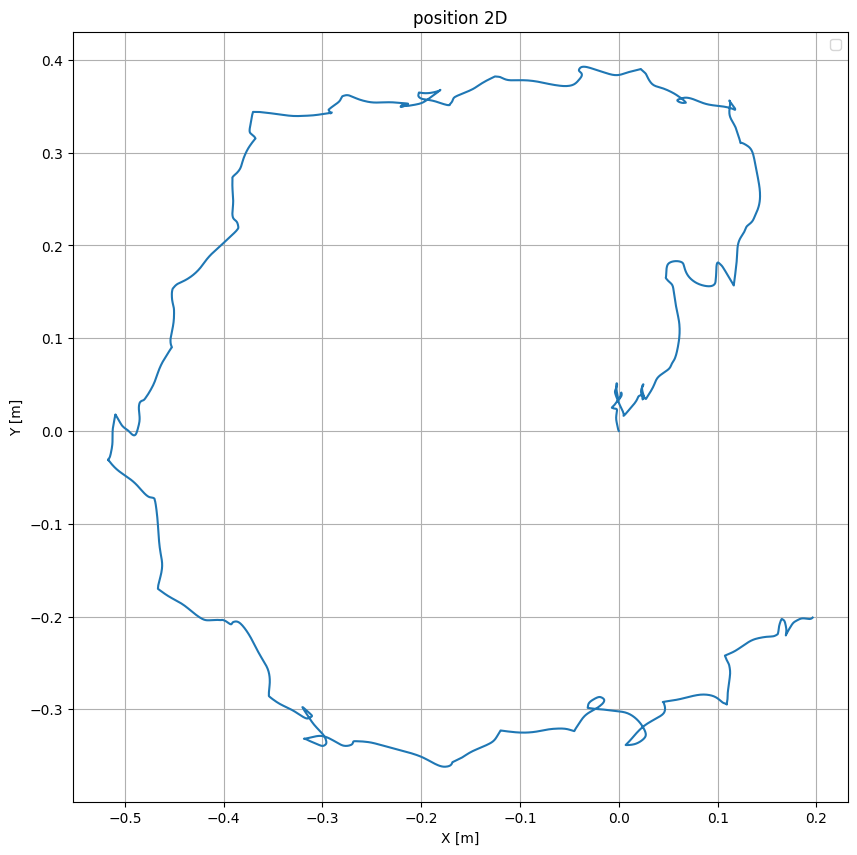

In [40]:
# plot position 2D

fig, axes = plt.subplots(nrows=1, figsize=(10,10))

axes.plot(hf['position', 'x'], hf['position', 'y'])
axes.set_xlabel('X [m]')
axes.set_ylabel('Y [m]')
axes.set_title('position 2D')
axes.legend()
axes.grid()

fig.savefig(f'path2D_{fn}.png', dpi=300)
plt.show()